# Aula 05: Visualizações Avançadas e Padrões       

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---


# Importar Dataset
**Fonte:** https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-card-fraud' dataset.
Path to dataset files: /kaggle/input/credit-card-fraud


# Criar Dataframe

In [2]:
import os
import pandas as pd

path_csv = os.path.join(path, 'card_transdata.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


# Parte 1: Da Hipótese à Visão Geral - O Poder da Correlação


---



1.    Conectando com a Aula 4: Peguem o scatter plot que vocês criaram na Aula 04. Aquele gráfico mostrava uma correlação? Ela era positiva (sobe junto), negativa (uma sobe, outra desce) ou fraca/inexistente? Como a "forma da nuvem de pontos" se traduz nessa ideia?           
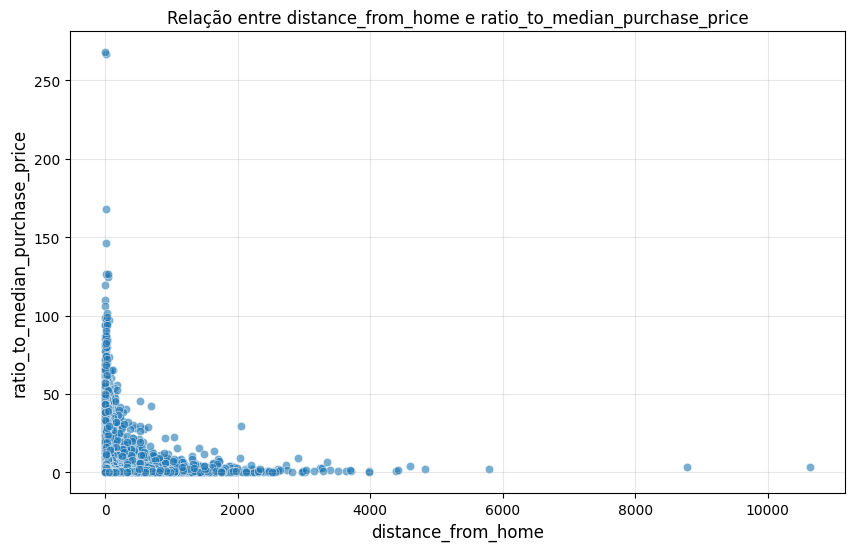
Resp.: Gráfico Scatter Plot entre Distancia da Compra em relação à casa do titular e Valor da Compra. Percebemos uma correlação positiva porém leve, indicando que quando mais perto de casa maior tende a ser o valor da compra.

2.   Pensando à Frente: Olhando para a sua pergunta de negócio, quais variáveis vocês esperam que tenham uma correlação forte com a nossa variável-alvo (ex:  preço_do_imóvel ,  taxa_de_churn )? Por quê? Listem duas hipóteses.   

Resp.: Nossa variável alvo é fraude. Acreditamos que distancia da transação atual em relação à transação anterior e se a compra foi online são as duas variáveis que terão mais correlação ào acontecimento de fraudes, pois pensamos que essas costuman acontecer em compras online em lojas de paises diferentes do pais do titular.

3. O Alerta da Causalidade: Vamos supor que descobrimos uma correlação positiva forte entre "número de sorvetes vendidos" e "ataques de tubarão". Isso significa que vender sorvete causa ataques? Qual poderia ser a variável "escondida" (a causa real) que influencia as duas coisas? Como esse raciocínio se aplica ao nosso projeto?

Resp.: Não significa que vender sorvetes causa ataques. Existem variáveis escondidas, como por exemplo, tempo ensolarado e periodo de férias, que podem aumentar a quantidade de pessoas na praia e consequentement o numero de ataques. É importante ter ciência desse fenomeno, pois no nosso trabalho podemos encontrar relações ilusórias como essa.




##

# Parte 2: O Mapa do Tesouro - Visualizando Correlações com Heatmap

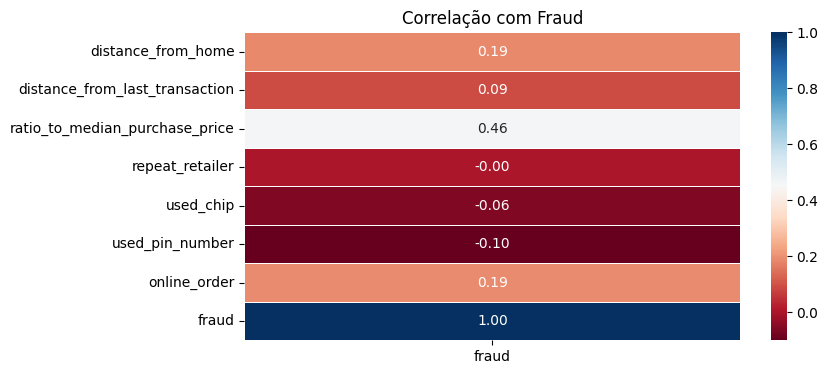

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# criar o heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix[['fraud']], annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlação com Fraud')
plt.show()

# Interpretação

O heatmap indica que a métrica com maior correlação à fraude é o valor da compra, que no dataset é indicado como a razão entre o valor da compra e o valor médio das compras anteriores.
O heatmap confirma nossas hipoteses, pois mostra que existe uma correlação entre distancia, compra online e fraude. Mesmo que essa seja menor do que a correlação com o preço da compra.



---



# Parte 3: O Diagnóstico Rápido - Explorando Relações com Pair Plot

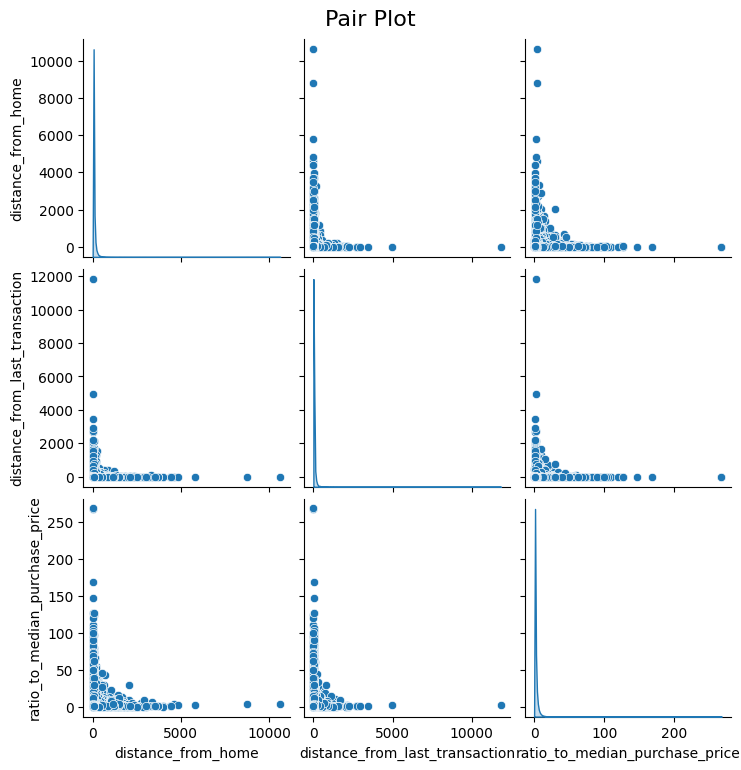

In [20]:
colunas_para_pairplot = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

if len(colunas_para_pairplot) > 1:
  sns.pairplot(df[colunas_para_pairplot], diag_kind='kde')
  plt.suptitle('Pair Plot', y=1.02, fontsize=16)
  plt.show()

In [ ]:
colunas_para_pairplot = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

if len(colunas_para_pairplot) > 1 and 'fraud' in df.columns:
    sns.pairplot(df[colunas_para_pairplot + ['fraud']], diag_kind='kde', hue='fraud')
    plt.suptitle('Pair Plot', y=1.02, fontsize=16)
    plt.show()